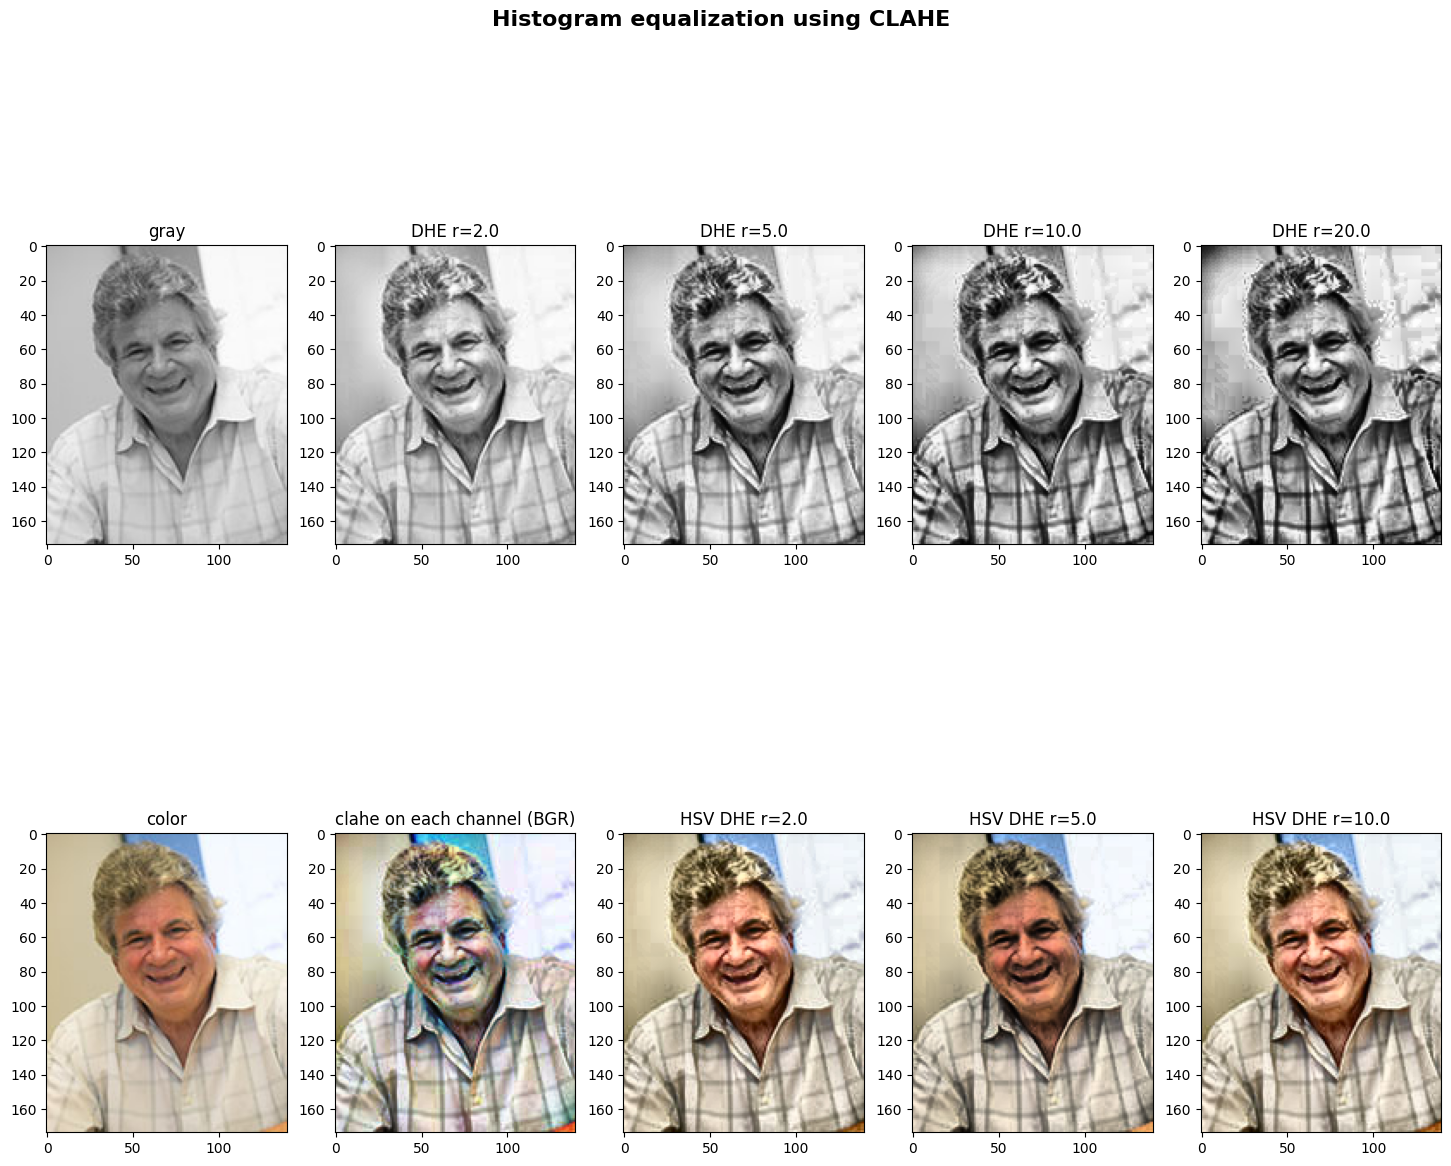

In [ ]:
"""
Histogram equalization using CLAHE
"""

# Import required packages:
import cv2
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 5, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    # plt.axis('off')


def equalize_clahe_color_hsv(img):
    """Equalize the image splitting it after conversion to HSV and applying CLAHE
    to the V channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    eq_V = cla.apply(V)
    eq_image = cv2.cvtColor(cv2.merge([H, S, eq_V]), cv2.COLOR_HSV2BGR)
    return eq_image


def equalize_clahe_color_lab(img):
    """Equalize the image splitting it after conversion to LAB and applying CLAHE
    to the L channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    L, a, b = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2Lab))
    eq_L = cla.apply(L)
    eq_image = cv2.cvtColor(cv2.merge([eq_L, a, b]), cv2.COLOR_Lab2BGR)
    return eq_image


def equalize_clahe_color_yuv(img):
    """Equalize the image splitting it after conversion to YUV and applying CLAHE
    to the Y channel and merging the channels and convert back to BGR
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    Y, U, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2YUV))
    eq_Y = cla.apply(Y)
    eq_image = cv2.cvtColor(cv2.merge([eq_Y, U, V]), cv2.COLOR_YUV2BGR)
    return eq_image


def equalize_clahe_color(img):
    """Equalize the image splitting the image applying CLAHE to each channel
    and merging the results
    """

    cla = cv2.createCLAHE(clipLimit=4.0)
    channels = cv2.split(img)
    eq_channels = []
    for ch in channels:
        eq_channels.append(cla.apply(ch))

    eq_image = cv2.merge(eq_channels)
    return eq_image


# Create the dimensions of the figure and set title:
plt.figure(figsize=(18, 14))
plt.suptitle("Histogram equalization using CLAHE", fontsize=16, fontweight='bold')

# Load the image and convert it to grayscale:
image = cv2.imread('TannenbaumAllen.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create clahe:
clahe = cv2.createCLAHE(clipLimit=2.0)
# Apply CLAHE to the grayscale image varying clipLimit parameter:
gray_image_clahe = clahe.apply(gray_image)
clahe.setClipLimit(5.0)
gray_image_clahe_2 = clahe.apply(gray_image)
clahe.setClipLimit(10.0)
gray_image_clahe_3 = clahe.apply(gray_image)
clahe.setClipLimit(20.0)
gray_image_clahe_4 = clahe.apply(gray_image)

# Now, try the four created functions for equalize color images using CLAHE:
image_clahe_color = equalize_clahe_color(image)
image_clahe_color_lab = equalize_clahe_color_lab(image)
image_clahe_color_hsv = equalize_clahe_color_hsv(image)
image_clahe_color_yuv = equalize_clahe_color_yuv(image)

# Plot all the images
show_img_with_matplotlib(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray", 1)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe, cv2.COLOR_GRAY2BGR), "DHE r=2.0", 2)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_2, cv2.COLOR_GRAY2BGR), "DHE r=5.0", 3)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_3, cv2.COLOR_GRAY2BGR), "DHE r=10.0", 4)
show_img_with_matplotlib(cv2.cvtColor(gray_image_clahe_4, cv2.COLOR_GRAY2BGR), "DHE r=20.0", 5)
show_img_with_matplotlib(image, "color", 6)
show_img_with_matplotlib(image_clahe_color, "clahe on each channel (BGR)", 7)
show_img_with_matplotlib(image_clahe_color_lab, "HSV DHE r=2.0", 8)
show_img_with_matplotlib(image_clahe_color_hsv, "HSV DHE r=5.0", 9)
show_img_with_matplotlib(image_clahe_color_yuv, "HSV DHE r=10.0", 10)

# Show the Figure:
plt.show()


COLOR enhancement

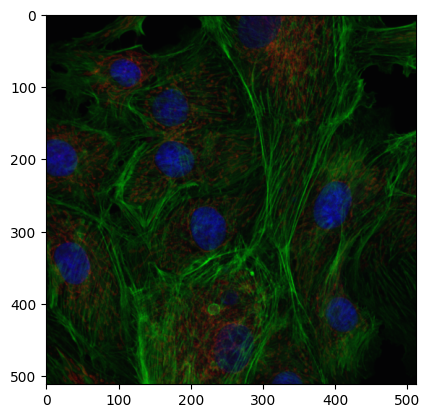

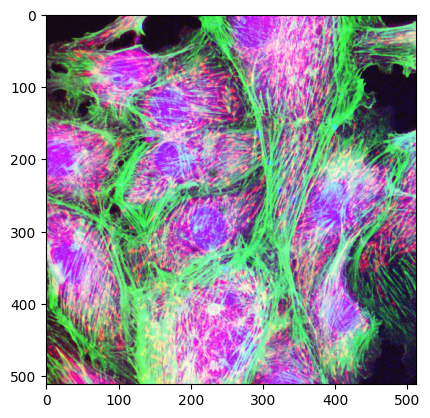

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Load image
img = cv2.imread('/content/drive/MyDrive/Medical imaging project/Image-Contrast-Enhancement/testdata/cell.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split image into RGB channels
r, g, b = cv2.split(img)

# Define number of bins for histogram equalization
n_bins = 256

# Compute histograms for each channel
hist_r, bins_r = np.histogram(r.flatten(), n_bins, [0, 256])
hist_g, bins_g = np.histogram(g.flatten(), n_bins, [0, 256])
hist_b, bins_b = np.histogram(b.flatten(), n_bins, [0, 256])

# Compute cumulative distribution function (CDF) for each channel
cdf_r = hist_r.cumsum()
cdf_g = hist_g.cumsum()
cdf_b = hist_b.cumsum()

# Normalize CDF to a scale of 0-1
cdf_r_norm = cdf_r / cdf_r[-1]
cdf_g_norm = cdf_g / cdf_g[-1]
cdf_b_norm = cdf_b / cdf_b[-1]

# Create mesh grid of image pixels
x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))

# Compute the enhanced value for each pixel in each channel
r_val = np.interp(r, bins_r[:-1], cdf_r_norm * 255)
g_val = np.interp(g, bins_g[:-1], cdf_g_norm * 255)
b_val = np.interp(b, bins_b[:-1], cdf_b_norm * 255)

# Create enhanced image by combining RGB channels
result = cv2.merge((r_val, g_val, b_val)).astype(np.uint8)

# Display original and enhanced image
plt.imshow( img)
plt.show()
plt.imshow(result)
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Triangulation algorithm from the paper

In [ ]:
import numpy as np
import cv2
from scipy.spatial import Delaunay

def deform_color_hist(H, N, alpha):
    # Initialize a triangular mesh M in color space
    B, G, R = np.indices((32, 32, 32))
    M = np.vstack((B.flatten(), G.flatten(), R.flatten())).T.astype(np.float32)

    # Create Delaunay triangulation of mesh vertices
    tri = Delaunay(M)

    for i in range(N):
        # Compute the deformation energy E(M,H)
        E = compute_energy(tri, H, M)

        # Compute the gradient of E with respect to M
        dM = compute_gradient(tri, H, M)

        # Update M by moving each vertex along the negative gradient direction by alpha
        M -= alpha * dM

        # Re-compute the Delaunay triangulation with updated vertices
        tri = Delaunay(M)

    # Compute the color mapping function f(M)
    f = compute_color_mapping(tri, H, M)

    # Apply f to H to obtain H'
    H_prime = np.zeros_like(H)
    for i in range(3):
        H_prime[..., i] = f[i](H[..., i]).astype(np.uint8)

    return H_prime

def compute_energy(tri, H, M):
    # Compute the color distances between each triangle and its corresponding centroid in H
    centroids = H[tri.vertices].mean(axis=1)
    distances = np.sqrt(((centroids - H[tri.vertices])**2).sum(axis=2))

    # Compute the sum of distances as deformation energy
    E = distances.sum()

    return E

def compute_gradient(tri, H, M):
    # Compute the color distances between each triangle and its corresponding centroid in H
    centroids = H[tri.vertices].mean(axis=1)
    distances = np.sqrt(((centroids - H[tri.vertices])**2).sum(axis=2))

    # Compute the gradient of energy with respect to each vertex
    dE_dM = np.zeros_like(M)
    for i, vertices in enumerate(tri.vertices):
        centroid = centroids[i]
        for j, vertex in enumerate(vertices):
            d = centroid - M[vertex]
            norm = np.linalg.norm(d)
            if norm == 0:
                continue
            dE_dM[vertex] += distances[i, j] / norm * d

    return dE_dM

def compute_color_mapping(tri, H, M):
    # Compute the barycentric coordinates for each pixel in H
    barycentric_coords = tri.transform(H)

    # Create a list of color mapping functions for each channel
    f = []
    for i in range(3):
        # Compute the color mapping function for this channel
        color_values = np.zeros_like(M[:, i], dtype=np.float32)
        for j in range(3):
            color_values += barycentric_coords[..., j] * M[tri.vertices[:, j], i]
        f_i = lambda x: np.interp(x, M[:, i], color_values)
        f.append(f_i)

    return f


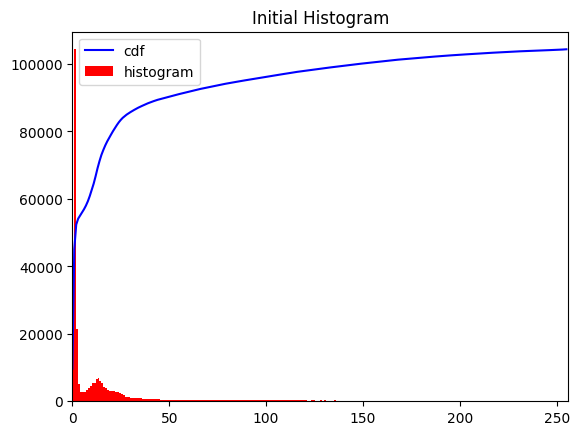

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Medical imaging project/Image-Contrast-Enhancement/testdata/01.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title('Initial Histogram')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



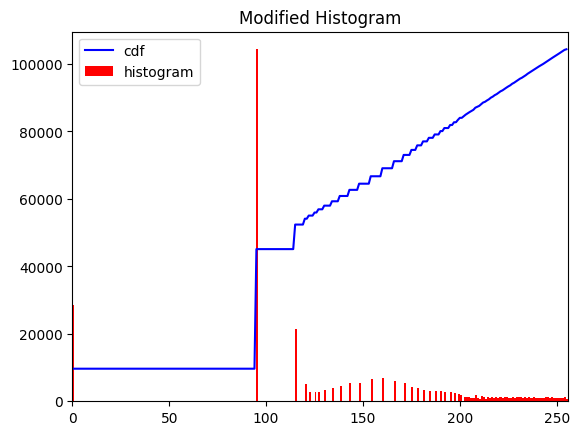

In [ ]:
import numpy as np
import cv2



# create a CLAHE object (Arguments are optional).
equ = cv2.equalizeHist(img)

hist,bins = np.histogram(equ.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.title('Modified Histogram')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

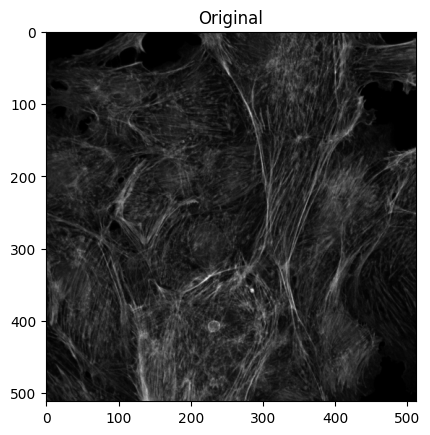

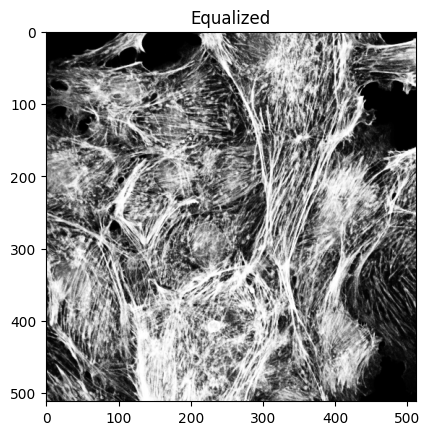

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Medical imaging project/Image-Contrast-Enhancement/testdata/cell.png', 0)
equ = cv2.equalizeHist(img)

plt.imshow(img, 'gray')
plt.title('Original')
plt.show()
plt.imshow(equ, 'gray')
plt.title('Equalized')
plt.show()

# show_img_with_matplotlib(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), "Original", 1)
# show_img_with_matplotlib(cv2.cvtColor(equ, cv2.COLOR_GRAY2BGR), "Equalized", 2)

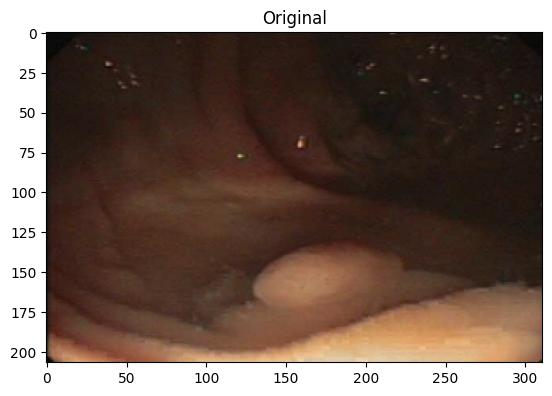

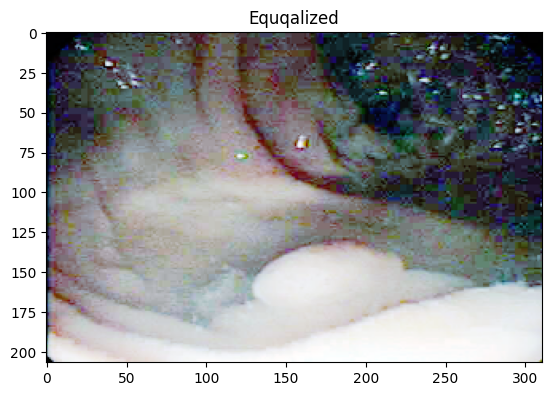

In [ ]:
import cv2

def color_histogram_equalization(img):
    # Split the image into its RGB channels
    r, g, b = cv2.split(img)

    # Apply histogram equalization to each channel
    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)

    # Merge the equalized channels back into an RGB image
    img_eq = cv2.merge((r_eq, g_eq, b_eq))

    return img_eq


img = cv2.imread('/content/drive/MyDrive/Medical imaging project/Image-Contrast-Enhancement/testdata/target.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
equ = color_histogram_equalization(img)
plt.imshow(img)
plt.title('Original')
plt.show()
plt.imshow(equ)
plt.title('Equqalized')
plt.show()

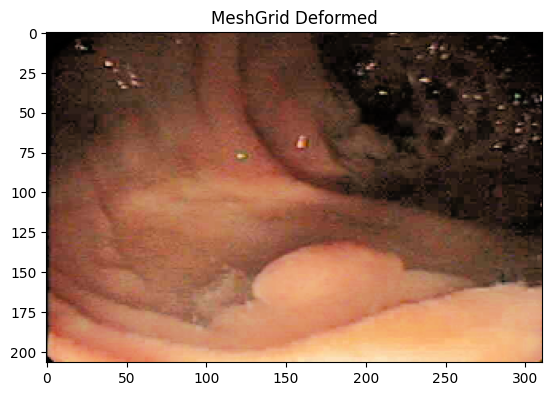

In [ ]:
import cv2
import numpy as np

def rgb_histogram_equalization_hsv(img):
    # Convert image from RGB to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Split the image into its HSV channels
    h, s, v = cv2.split(hsv_img)

    # Apply histogram equalization to the value channel
    v_eq = cv2.equalizeHist(v)

    # Merge the equalized value channel back into the HSV image
    hsv_img_eq = cv2.merge((h, s, v_eq))

    # Convert the HSV image back to RGB
    img_eq = cv2.cvtColor(hsv_img_eq, cv2.COLOR_HSV2RGB)

    return img_eq

img = cv2.imread('/content/drive/MyDrive/Medical imaging project/Image-Contrast-Enhancement/testdata/target.png')
out = rgb_histogram_equalization_hsv(img)
plt.imshow(out)
plt.title('MeshGrid Deformed')
plt.show()

In [ ]:
import cv2
import numpy as np
import math
def mesh_deformation_color_hist_eq(img, mesh_rows=280, mesh_cols=188, num_iterations=10):
    # Convert the input image to LAB color space
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # Initialize the mesh coordinates
    rows, cols, _ = lab_img.shape
    x_coords = np.linspace(0, cols, mesh_cols+1, dtype=np.float32, endpoint=True)
    y_coords = np.linspace(0, rows, mesh_rows+1, dtype=np.float32, endpoint=True)
    x_mesh, y_mesh = np.meshgrid(x_coords, y_coords)
    mesh = np.dstack([x_mesh, y_mesh])
    
    # Compute the gradient of the luminance channel
    luminance = lab_img[:,:,0].astype(np.float32) / 255.
    sobel_x = cv2.Sobel(luminance, cv2.CV_32F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(luminance, cv2.CV_32F, 0, 1, ksize=3)
    grad_mag = np.sqrt(sobel_x**2 + sobel_y**2)
    grad_x = sobel_x / (grad_mag + 1e-8)
    grad_y = sobel_y / (grad_mag + 1e-8)
    
    # Perform mesh deformation to achieve contrast enhancement
    for iteration in range(num_iterations):
        # Compute the average color value in each mesh region
        avg_colors = np.zeros((mesh_rows, mesh_cols, 3), dtype=np.float32)
        for i in range(mesh_rows):
            for j in range(mesh_cols):
                x_start, y_start = mesh[i,j]
                x_end, y_end = mesh[i+1,j+1]
                avg_colors[i,j] = np.mean(lab_img[int(y_start):int(y_end), int(x_start):int(x_end)], axis=(0,1))
        
        # Update the mesh coordinates based on the average color values and gradient direction
        mesh_step_size = 10
        mesh_delta = np.zeros((mesh_rows+1, mesh_cols+1, 2), dtype=np.float32)
        for i in range(mesh_rows+1):
            for j in range(mesh_cols+1):
                if i > 0 and j > 0 and i < mesh_rows and j < mesh_cols:
                    print(mesh[i-1][j-1])
                    grad_direction = np.arctan2(grad_y[math.floor(mesh[i-1,j-1][1])-5, math.floor(mesh[i-1,j-1][0])-5], 
                                                grad_x[math.floor(mesh[i-1,j-1][1])-5, math.floor(mesh[i-1,j-1][0])-5])
                    mesh_delta[i,j] = mesh_step_size * np.array([np.cos(grad_direction), np.sin(grad_direction)])
                else:
                    mesh_delta[i,j] = [0, 0]
        mesh += mesh_delta
    
    # Perform histogram equalization on the luminance channel
    lab_img[:,:,0] = cv2.equalizeHist(lab_img[:,:,0])
    
    # Convert the output image back to BGR color space
    out_img = cv2.cvtColor(lab_img, cv2.COLOR_LAB2BGR)

    
    return out_img


img = cv2.imread('color_2.png')
out_img = mesh_deformation_color_hist_eq(img)
cv2.imwrite('output_image.jpg', out_img)

Anisotropic Diffusion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


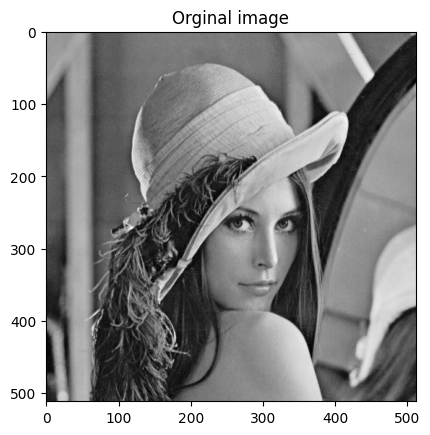

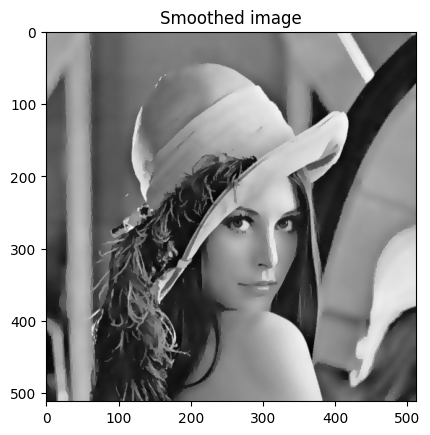

/usr/local/lib/python3.10/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.10/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


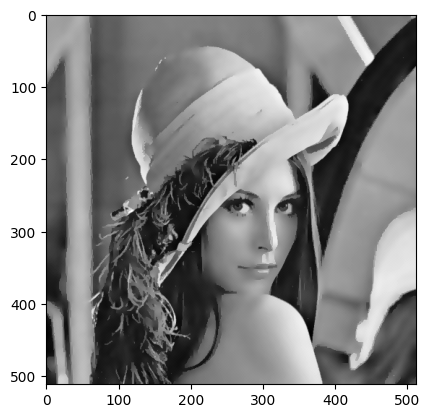

In [ ]:
import numpy as np
# !pip install medpy
from medpy.filter.smoothing import anisotropic_diffusion
import cv2
import matplotlib.pyplot as plt

def anisodiff(img,niter=35,kappa=9,gamma=0.35,step=(1.,1.),option=1,ploton=False):
    """
    Anisotropic diffusion.
 
    Usage:
    imgout = anisodiff(im, niter, kappa, gamma, option)
 
    Arguments:
            img    - input image
            niter  - number of iterations
            kappa  - conduction coefficient 20-100 ?
            gamma  - max value of .25 for stability
            step   - tuple, the distance between adjacent pixels in (y,x)
            option - 1 Perona Malik diffusion equation No 1
                     2 Perona Malik diffusion equation No 2
            ploton - if True, the image will be plotted on every iteration
 
    Returns:
            imgout   - diffused image.
 
    kappa controls conduction as a function of gradient.  If kappa is low
    small intensity gradients are able to block conduction and hence diffusion
    across step edges.  A large value reduces the influence of intensity
    gradients on conduction.
 
    gamma controls speed of diffusion (you usually want it at a maximum of
    0.25)
 
    step is used to scale the gradients in case the spacing between adjacent
    pixels differs in the x and y axes
 
    Diffusion equation 1 favours high contrast edges over low contrast ones.
    Diffusion equation 2 favours wide regions over smaller ones.
 
    Reference: 
    P. Perona and J. Malik. 
    Scale-space and edge detection using ansotropic diffusion.
    IEEE Transactions on Pattern Analysis and Machine Intelligence, 
    12(7):629-639, July 1990.
 
    Original MATLAB code by Peter Kovesi  
    School of Computer Science & Software Engineering
    The University of Western Australia
    pk @ csse uwa edu au
    <http://www.csse.uwa.edu.au>
 
    Translated to Python
    """
 
    # ...you could always diffuse each color channel independently if you
    # really want
    # if img.ndim == 3:
    #     warnings.warn("Only grayscale images allowed, converting to 2D matrix")
    #     img = img.mean(2)
 
    # initialize output array
    img = img.astype('float32')
    imgout = img.copy()
 
    # initialize some internal variables
    deltaS = np.zeros_like(imgout)
    deltaE = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    gS = np.ones_like(imgout)
    gE = gS.copy()
 
    # create the plot figure, if requested
    if ploton:
        import pylab as pl
        from time import sleep
 
        fig = pl.figure(figsize=(20,5.5),num="Anisotropic diffusion")
        ax1,ax2 = fig.add_subplot(1,2,1),fig.add_subplot(1,2,2)
 
        ax1.imshow(img,interpolation='nearest')
        ih = ax2.imshow(imgout,interpolation='nearest',animated=True)
        ax1.set_title("Original image")
        ax2.set_title("Iteration 0")
 
        fig.canvas.draw()
 
    for ii in range(niter):
 
        # calculate the diffs
        deltaS[:-1,: ] = np.diff(imgout,axis=0)
        deltaE[: ,:-1] = np.diff(imgout,axis=1)
 
        # conduction gradients (only need to compute one per dim!)
        if option == 1:
            gS = np.exp(-(deltaS/kappa)**2.)/step[0]
            gE = np.exp(-(deltaE/kappa)**2.)/step[1]
        elif option == 2:
            gS = 1./(1.+(deltaS/kappa)**2.)/step[0]
            gE = 1./(1.+(deltaE/kappa)**2.)/step[1]
 
        # update matrices
        E = gE*deltaE
        S = gS*deltaS
 
        # subtract a copy that has been shifted 'North/West' by one
        # pixel. don't as questions. just do it. trust me.
        NS[:] = S
        EW[:] = E
        NS[1:,:] -= S[:-1,:]
        EW[:,1:] -= E[:,:-1]
 
        # update the image
        imgout += gamma*(NS+EW)
 
        if ploton:
            iterstring = "Iteration %i" %(ii+1)
            ih.set_data(imgout)
            ax2.set_title(iterstring)
            fig.canvas.draw()
            # sleep(0.01)
 
    return imgout

# img = np.random.uniform(size=(32,32))
# img = cv2.imread('lena.png', 0)
img = cv2.imread('lena.jpg', 0)
#img_filtered = anisotropic_diffusion(img, niter=30, kappa=22, gamma=0.35)
# img_filtered = anisotropic_diffusion(img, niter=3, kappa=11, gamma=0.35)
img_filtered = anisodiff(img)
plt.imshow(img, 'gray')
plt.title('Orginal image')
plt.show()
plt.imshow(img_filtered, 'gray')
plt.title('Smoothed image')
plt.show()
img_filtered2 = anisotropic_diffusion(img, niter=35, kappa=9, gamma=0.35)
plt.imshow(img_filtered2, 'gray')
plt.show()

# plt.imshow(img-img_filtered, 'gray')
# plt.show()

CLAHE code

...Make the LUT...
(512, 512)
...Making the Histogram...
16 16 (16, 16, 128)


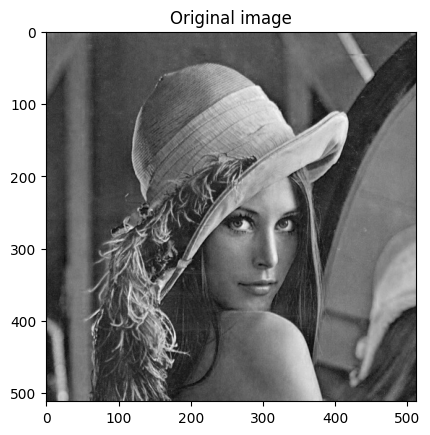

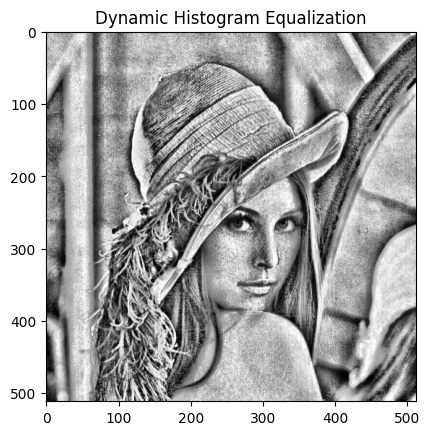

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2

#INTERPOLATION FUNCTION
def interpolate(subBin,LU,RU,LB,RB,subX,subY):
    subImage = np.zeros(subBin.shape)
    num = subX*subY
    for i in range(subX):
        inverseI = subX-i
        for j in range(subY):
            inverseJ = subY-j
            val = subBin[i,j].astype(int)
            subImage[i,j] = np.floor((inverseI*(inverseJ*LU[val] + j*RU[val])+ i*(inverseJ*LB[val] + j*RB[val]))/float(num))
    return subImage

#CLAHE FUNCTION
#ALL UTILITY FUNCTIONS COMBINED INTO ONE FUNCTION
def dhe(img,clipLimit,nrBins=128,nrX=0,nrY=0):
    '''img - Input image
       clipLimit - Normalized clipLimit. Higher value gives more contrast
       nrBins - Number of graylevel bins for histogram("dynamic range")
       nrX - Number of contextial regions in X direction
       nrY - Number of Contextial regions in Y direction'''
    h,w = img.shape
    if clipLimit==1:
        return
    nrBins = max(nrBins,128)
    if nrX==0:
        #Taking dimensions of each contextial region to be a square of 32X32
        xsz = 32
        ysz = 32
        nrX = np.ceil(h/xsz).astype(int)#240
        #Excess number of pixels to get an integer value of nrX and nrY
        excX= int(xsz*(nrX-h/xsz))
        nrY = np.ceil(w/ysz).astype(int)#320
        excY= int(ysz*(nrY-w/ysz))
        #Pad that number of pixels to the image
        if excX!=0:
            img = np.append(img,np.zeros((excX,img.shape[1])).astype(int),axis=0)
        if excY!=0:
            img = np.append(img,np.zeros((img.shape[0],excY)).astype(int),axis=1)
    else:
        xsz = round(h/nrX)
        ysz = round(w/nrY)
    
    nrPixels = xsz*ysz
    xsz2 = round(xsz/2)
    ysz2 = round(ysz/2)
    dheimg = np.zeros(img.shape)
    
    if clipLimit > 0:
        clipLimit = max(1,clipLimit*xsz*ysz/nrBins)
    else:
        clipLimit = 50
    
    #makeLUT
    print("...Make the LUT...")
    minVal = 0 #np.min(img)
    maxVal = 255 #np.max(img)
    
    #maxVal1 = maxVal + np.maximum(np.array([0]),minVal) - minVal
    #minVal1 = np.maximum(np.array([0]),minVal)
    
    binSz = np.floor(1+(maxVal-minVal)/float(nrBins))
    LUT = np.floor((np.arange(minVal,maxVal+1)-minVal)/float(binSz))
    
    #BACK TO dhe
    bins = LUT[img]
    print(bins.shape)
    #makeHistogram
    print("...Making the Histogram...")
    hist = np.zeros((nrX,nrY,nrBins))
    print(nrX,nrY,hist.shape)
    for i in range(nrX):
        for j in range(nrY):
            bin_ = bins[i*xsz:(i+1)*xsz,j*ysz:(j+1)*ysz].astype(int)
            for i1 in range(xsz):
                for j1 in range(ysz):
                    hist[i,j,bin_[i1,j1]]+=1
    
    #clipHistogram
    # print("...Clipping the Histogram...")
    if clipLimit>0:
        for i in range(nrX):
            for j in range(nrY):
                nrExcess = 0
                for nr in range(nrBins):
                    excess = hist[i,j,nr] - clipLimit
                    if excess>0:
                        nrExcess += excess
                
                binIncr = nrExcess/nrBins
                upper = clipLimit - binIncr
                for nr in range(nrBins):
                    if hist[i,j,nr] > clipLimit:
                        hist[i,j,nr] = clipLimit
                    else:
                        if hist[i,j,nr]>upper:
                            nrExcess += upper - hist[i,j,nr]
                            hist[i,j,nr] = clipLimit
                        else:
                            nrExcess -= binIncr
                            hist[i,j,nr] += binIncr
                
                if nrExcess > 0:
                    stepSz = max(1,np.floor(1+nrExcess/nrBins))
                    for nr in range(nrBins):
                        nrExcess -= stepSz
                        hist[i,j,nr] += stepSz
                        if nrExcess < 1:
                            break
    
    #mapHistogram
    # print("...Mapping the Histogram...")
    map_ = np.zeros((nrX,nrY,nrBins))
    #print(map_.shape)
    scale = (maxVal - minVal)/float(nrPixels)
    for i in range(nrX):
        for j in range(nrY):
            sum_ = 0
            for nr in range(nrBins):
                sum_ += hist[i,j,nr]
                map_[i,j,nr] = np.floor(min(minVal+sum_*scale,maxVal))
    
    #BACK TO dhe
    #INTERPOLATION
    # print("...interpolation...")
    xI = 0
    for i in range(nrX+1):
        if i==0:
            subX = int(xsz/2)
            xU = 0
            xB = 0
        elif i==nrX:
            subX = int(xsz/2)
            xU = nrX-1
            xB = nrX-1
        else:
            subX = xsz
            xU = i-1
            xB = i
        
        yI = 0
        for j in range(nrY+1):
            if j==0:
                subY = int(ysz/2)
                yL = 0
                yR = 0
            elif j==nrY:
                subY = int(ysz/2)
                yL = nrY-1
                yR = nrY-1
            else:
                subY = ysz
                yL = j-1
                yR = j
            UL = map_[xU,yL,:]
            UR = map_[xU,yR,:]
            BL = map_[xB,yL,:]
            BR = map_[xB,yR,:]
            #print("dhe vals...")
            subBin = bins[xI:xI+subX,yI:yI+subY]
            #print("dhe subBin shape: ",subBin.shape)
            subImage = interpolate(subBin,UL,UR,BL,BR,subX,subY)
            dheimg[xI:xI+subX,yI:yI+subY] = subImage
            yI += subY
        xI += subX
    
    if excX==0 and excY!=0:
        return dheimg[:,:-excY]
    elif excX!=0 and excY==0:
        return dheimg[:-excX,:]
    elif excX!=0 and excY!=0:
        return dheimg[:-excX,:-excY]
    else:
        return dheimg


image = cv2.imread('lena.jpg')
dhe_img = dhe(image[:,:,2],8,0,0)
#clipLimit = 8 gave decent results on eyePACs Dataset
#and setting xsz and ysz = 32
#and calculating nrX and nrY

# fig,axs = plt.subplots(1,2,figsize=(200,100))
plt.imshow(image[:,:,0],cmap='gray')
plt.title('Original image')
plt.show()
plt.imshow(dhe_img,cmap='gray')
plt.title('Dynamic Histogram Equalization')
plt.show()

Text(0.5, 1.0, 'Smoothed DHE')

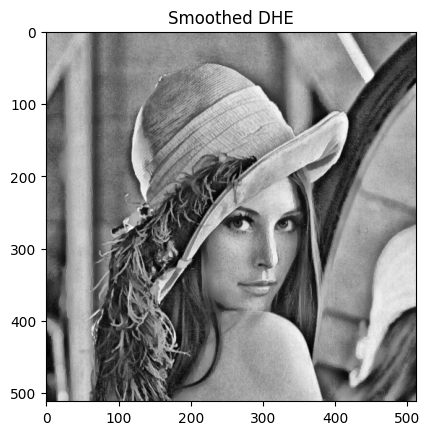

In [ ]:
alpha = 0.7
output = (1-alpha) * dhe_img + alpha * img_filtered
plt.imshow(output, 'gray')
plt.title('Smoothed DHE')